In [1]:
%run chapter\ 1.ipynb
%run chapter\ 2.ipynb
%run chapter\ 3.ipynb
%run chapter\ 4.ipynb
%run chapter\ 5.ipynb
%run chapter\ 6.ipynb
%run chapter\ 7.ipynb
%run chapter\ 10.ipynb

In [ ]:
# TODO implement bi-directional path tracing or photon mapping
# http://graphics.ucsd.edu/~henrik/papers/photon_map/global_illumination_using_photon_maps_egwr96.pdf



import doctest
doctest.testmod()

canvas construction start at 2019-09-03 16:13:19.158734+00:00
canvas constructed in 6586.363006 seconds.
ppm constructed
ppm file written


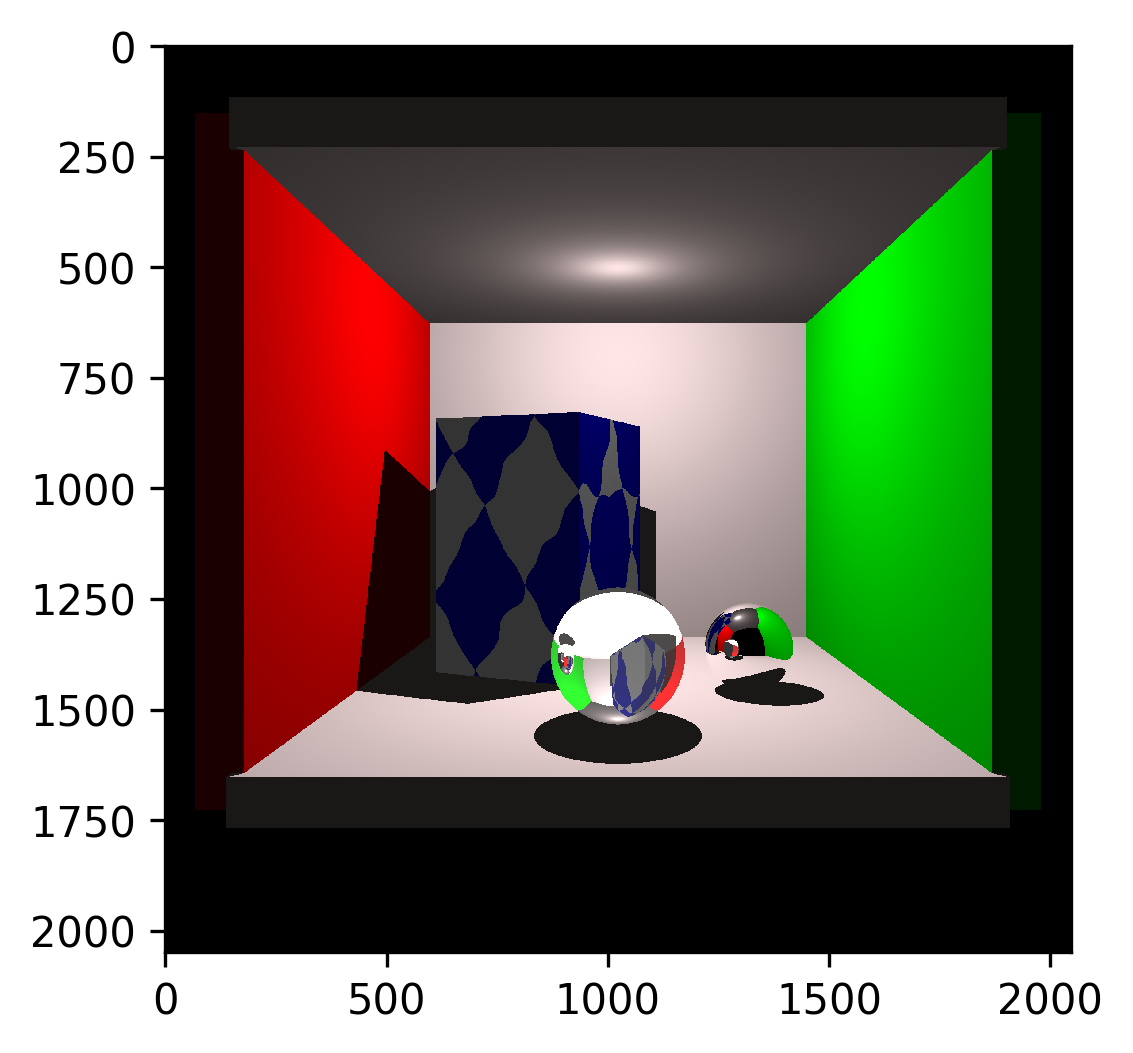

In [2]:
cam_w = 100
cam_h = cam_w

close_up = False

file_name = './cornellbox16.'
ppm_ext = 'ppm'
jpg_ext = 'jpg'

wall_color = color(1, 0.9, 0.9)
camera_transform = (point(0, 2.2, -9.5), point(0, 2.2, 1), vector(0, 1, 0))
if close_up:
    camera_transform = (point(0, 2.0, -3), point(-0.5, 1.0, 1), vector(0, 1, 0))


world = default_world()
world.contains = []
world.lights = [point_light(point(1.5, 4.8, 1.5), color(.1, .1, .1)),
                point_light(point(0, 4.8, 1.5), color(.1, .1, .1)),
                point_light(point(-1.5, 4.8, 1.5), color(.1, .1, .1)),
                point_light(point(1.5, 4.8, 0), color(.1, .1, .1)),
                point_light(point(0, 4.8, 0), color(.2, .2, .2)),
                point_light(point(-1.5, 4.8, 0), color(.1, .1, .1)),
                point_light(point(1.5, 4.8, -1.5), color(.1, .1, .1)),
                point_light(point(0, 4.8, -1.5), color(.1, .1, .1)),
                point_light(point(-1.5, 4.8, -1.5), color(.1, .1, .1))]

world.lights = [point_light(point(0, 4.5, 0), color(1, 1, 1))]
if close_up:
    world.lights = [point_light(point(0, 2, -1), color(1, 1, 1))]

p1 = checker_pattern(WHITE, color(0,0,1))
p1.transform = rotation_z(np.pi/4) * rotation_x(np.pi/4) #matrix_multiply(translation(np.sqrt(72),0,0), matrix_multiply(rotation_y(np.pi/4), scaling(np.sqrt(72) + 0.5, np.sqrt(72) + 0.5, np.sqrt(72) + 0.5)))

p2 = stripe_pattern(color(1,0,0), color(1, 0.7, 0.8))
p2.transform = matrix_multiply(rotation_y(np.pi/4), scaling(0.15,1,1))

p3 = blended_pattern(p1, p2) # blended_pattern(blended_pattern(p1, p2), ring_pattern(color(0,0,1), color(0,0,0.1)))

p4 = stripe_pattern(WHITE, color(0.8, 0.8, 0.8))
p4.transform = matrix_multiply(rotation_y(-np.pi/4), scaling(0.1,1,1))

p5 = nested_pattern(p1, p2, p4)
p6 = checker_pattern(WHITE, BLACK)
p6.transform = shearing(1,0,0,0,0,0) *scaling(0.5,0.5,0.5)#matrix_multiply(rotation_x(-np.pi/4), scaling(0.1,0.1,0.1))
p7 = perturbed_pattern(p5)

p8 = perturbed_pattern(p6, scale_factor=0.05, frequency=0.1, octaves=7)#p6#uv_map_pattern(perturbed_pattern(p6, scale_factor=0.2, frequency=0.4, octaves=1))
#p9 = perturbed_pattern(p2, scale_factor=0.3, frequency=0.4, octaves=1)

p9 = perturbed_pattern(p1, scale_factor=0.1, frequency=0.4, octaves=1)

floor = cube()
floor.material.color = wall_color
floor.material.specular = 0
floor.material.diffuse = 0.9
floor.transform = translation(0,-0.2,-0.1) * scaling(3.1, 0.2, 3.2)
#floor.material.pattern = p9

ceiling = cube()
ceiling.material.color = wall_color
ceiling.material.specular = 0
ceiling.material.reflective = 0.0
ceiling.transform = translation(0,5.2,-0.05) * scaling(3.1, 0.2, 3.2)


back_wall = cube()
back_wall.transform = translation(0,2.5,3.2) * rotation_x(np.pi/2) * scaling(3.1, 0.2, 3)
back_wall.material.color = wall_color
back_wall.material.specular = 0
#back_wall.material.pattern = p9


left_wall = cube()
left_wall.material.color = color(1,0,0)
left_wall.material.specular = 0
left_wall.material.reflective = 0.0
left_wall.transform = translation(-3.2, 2.5, 0) * rotation_z(-np.pi/2) * scaling(2.8, 0.2, 3.2)


right_wall = cube()
right_wall.material.color = color(0,1,0)
right_wall.material.specular = 0
right_wall.material.shininess = 300
right_wall.transform = translation(3.2, 2.5, 0) * rotation_z(np.pi/2) * scaling(2.8, 0.2, 3.2)


middle = cube()
middle.transform =  translation(-1.0, 1.61, 1.0) * scaling(1.0, 1.61, 1.0) * rotation_y(np.pi/8)
middle.material = material()
middle.material.color = wall_color
#middle.material.reflective = 0.0
#middle.material.diffuse = 0.6
middle.material.ambient = 0.2
middle.material.specular = 0.0
middle.material.pattern = p9
#middle.material.transparency = 0.0
#middle.material.shininess = 200.0


right = sphere()
right.transform = matrix_multiply(translation(1.5, 0.5, -0.5), scaling(0.5, 0.5, 0.5))
right.material = material()
right.material.color = color(0,0,0)
right.material.diffuse = 0.0
right.material.specular = 1.0
right.material.reflective = 1.0
right.material.shininess = 300


left = sphere()
left.transform = matrix_multiply(translation(0.0, 0.66, -1.75), scaling(0.66, 0.66, 0.66))
left.material = material()
left.material.color = color(1, 1, 1)
left.material.diffuse = 0.0
left.material.specular = 1.0
left.material.transparency = 1.0
left.material.reflectivity = 1.0
left.material.refractive_index = 2.5
left.material.shininess = 300


world.contains.extend([floor, ceiling, left_wall, right_wall, back_wall, middle, right, left])


cam = camera(cam_w, cam_h, np.pi/3)
cam.transform = view_transform(*camera_transform)


from datetime import datetime, timezone, timedelta
now = datetime.now(timezone.utc)
epoch = datetime(1970, 1, 1, tzinfo=timezone.utc) # use POSIX epoch
posix_timestamp_micros_before = (now - epoch) / timedelta(microseconds=1)

print('canvas construction start at {}'.format(now))
# render the result to a canvas.
ca = render_multi(cam, world, 4)


now = datetime.now(timezone.utc)
epoch = datetime(1970, 1, 1, tzinfo=timezone.utc) # use POSIX epoch
posix_timestamp_micros_after = (now - epoch) / timedelta(microseconds=1)
delta = posix_timestamp_micros_after - posix_timestamp_micros_before
print('canvas constructed in {} seconds.'.format(delta/1000000))


ppm = construct_ppm(ca)
print('ppm constructed')

with open(file_name + ppm_ext, 'wb') as f:
    f.write(ppm)
print('ppm file written')

import PIL.Image as Image
from matplotlib.pyplot import imshow

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
im = Image.open(file_name + ppm_ext, 'r')
im.save(file_name + jpg_ext)
imshow(im)

In [ ]:
origin = point(1,2,3)
-origin -1.0 